***
LIBRARIES: most required ones
***

In [1]:
from tqdm import tqdm # progress bar
import matplotlib.pyplot as plt # plot


import torch # pytorch
import torch.nn as nn # neural network
import torch.optim as optim # optimizer
from torchsummary import summary # model summary (architecture)
from torch.utils.data import DataLoader, random_split # dataloader, dataset split
from torchvision import transforms,datasets # image processing, datasets
import torchvision.models as models # pretrained models
import torchvision
import numpy as np
import pandas as pd



In [ ]:
# pip install torchsummary

In [2]:
DATA_PATH = './data/datasets/'

***
DATA LOADING
***

In [3]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

In [4]:
dataset = datasets.ImageFolder('./data/dataset/', transform=data_transforms['validation'])


In [5]:
train_size = int(0.7 * 1500)
test_size = 1500 - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [6]:
train_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [8]:
classes = ('cloudy','foggy','rainy','shine','sunrise')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


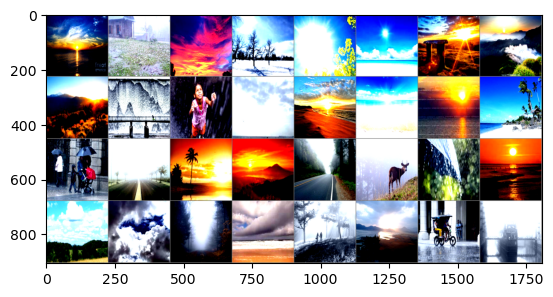

sunrise rainy sunrise shine shine shine sunrise sunrise sunrise rainy rainy cloudy sunrise shine sunrise shine rainy foggy sunrise sunrise foggy foggy rainy sunrise cloudy cloudy foggy cloudy foggy cloudy rainy foggy


In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

***
ARCHITECTURE DEFINING
***

In [10]:
model = models.resnet50(pretrained=True).to(device)
    
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 5)).to(device)

d:\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

test_________________________

test________________

***
OBJECTS: CRITERION, OPTIMIZER, SCHEDULER(maybe)
***

***
TRAINING AND VALIDATION: Validation not neccessary but recommended
***

In [123]:
loss_arr = []
acc_arr = []
n_epochs = 2
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass 
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

         # print statistics
        running_loss += loss.item()
        loss_arr.append(running_loss)

        running_loss = 0.0
        
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_arr.append(100* correct/total)


    print('Epoch %d: Accuracy: %d %%' % (epoch,(100 * correct / total)))

Epoch 0: Accuracy: 23 %
Epoch 1: Accuracy: 41 %
Epoch 2: Accuracy: 33 %
Epoch 3: Accuracy: 56 %
Epoch 4: Accuracy: 63 %
Epoch 5: Accuracy: 66 %
Epoch 6: Accuracy: 68 %
Epoch 7: Accuracy: 70 %
Epoch 8: Accuracy: 68 %
Epoch 9: Accuracy: 72 %
Epoch 10: Accuracy: 74 %
Epoch 11: Accuracy: 74 %


In [117]:
for epoch in range(6):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print("inputs: ", inputs)
        # print("labels: ",labels )

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss:.3f}')
        running_loss = 0.0

        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Epoch %d: Accuracy: %d %%' % (epoch,(100 * correct / total)))

print('Finished Training')

torch.Size([32, 16, 53, 53])
[1,     1] loss: 1.545
torch.Size([32, 16, 53, 53])
[1,     2] loss: 1.519
torch.Size([32, 16, 53, 53])
[1,     3] loss: 1.498
torch.Size([32, 16, 53, 53])
[1,     4] loss: 1.509
torch.Size([32, 16, 53, 53])
[1,     5] loss: 1.457
torch.Size([32, 16, 53, 53])
[1,     6] loss: 1.504
torch.Size([32, 16, 53, 53])
[1,     7] loss: 1.464
torch.Size([32, 16, 53, 53])
[1,     8] loss: 1.504
torch.Size([32, 16, 53, 53])
[1,     9] loss: 1.453
torch.Size([32, 16, 53, 53])
[1,    10] loss: 1.354
torch.Size([32, 16, 53, 53])
[1,    11] loss: 1.581
torch.Size([32, 16, 53, 53])
[1,    12] loss: 1.407
torch.Size([32, 16, 53, 53])
[1,    13] loss: 1.279
torch.Size([32, 16, 53, 53])
[1,    14] loss: 1.473
torch.Size([2, 16, 53, 53])
[1,    15] loss: 1.291
torch.Size([32, 16, 53, 53])
[2,     1] loss: 1.459
torch.Size([32, 16, 53, 53])
[2,     2] loss: 1.375
torch.Size([32, 16, 53, 53])
[2,     3] loss: 1.338
torch.Size([32, 16, 53, 53])
[2,     4] loss: 1.363
torch.Size([3

***
PLOTTING: Loss & Accuracy
***

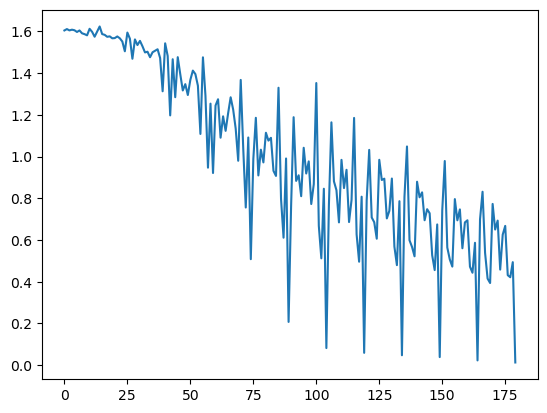

In [129]:
# Methods you may need
plt.figure, plt.subplot, plt.plot, plt.xlabel, plt.ylabel, plt.title, plt.legend, plt.show

# plt.plot(range(len(acc_arr)), acc_arr)
plt.plot(range(len(loss_arr)), loss_arr)

***
SAVING
***

In [130]:
width,height = 300,400
x = torch.Tensor(1, 3, width, height)
with torch.no_grad():
    traced_cell = torch.jit.trace(net, (x))
model_name = "./models/A_AHMED_MOADH.pt" # CHANGE THIS TO YOUR OWN PATH (most improtatnt step)
torch.jit.save(traced_cell, model_name)


# torch.save () this is not allowed because it requires class definition before loading for the 
# model evaluation

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x111744 and 44944x120)